In [84]:
import astropy.io.ascii as ascii
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import astropy.visualization as viz
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import astropy.wcs as WCS # you need this astropy module for processing fits files
import matplotlib as mpl
import numpy as np
from tqdm import tqdm
from astropy.table import Table, join
%matplotlib inline
from scipy.ndimage import interpolation
from skimage.transform import rescale, resize, downscale_local_mean


Read in the 10000 images

In [29]:
data = np.load('/Users/jegpeek/Dropbox/xorastro/imgcube-uint8-10000.npy')

Loop over the images, all flips, 45 degree rotations, and corners, a la Dieleman 2015 section 7.5: Viewpoint Extraction

In [85]:
x =108
print(data.shape[2])
all16 = np.zeros([45, 45, 10000, 2, 2, 2, 2])
for i in tqdm(range(10000)):
    rot45 = interpolation.rotate(data[:, :, i], 45)
    rot45_crop = rot45[int(grrot.shape[0]/2-424/2):
                       int(grrot.shape[0]/2+424/2), int(grrot.shape[1]/2-424/2): int(grrot.shape[1]/2+424/2)]
    rot45_cropper = rot45_crop[x:(-1)*x-1, x:(-1)*x-1]
    cropper = data[x:(-1)*x-1, x:(-1)*x-1, i]
    sixtynine_45 = downscale_local_mean(rot45_cropper, (3, 3))
    sixtynine = downscale_local_mean(cropper, (3, 3))
    for flip in range(2):
        if flip == 1:
            sixtynine = np.flip(sixtynine, 1)
            sixtynine_45 = np.flip(sixtynine_45, 1)
        for up in range(2):
            for right in range(2):
                all16[:,:, i, flip, up, right, 0] = sixtynine[24*right:45+24*right,24*up:45+24*up]
                all16[:,:, i, flip, up, right, 1] = sixtynine_45[24*right:45+24*right,24*up:45+24*up]
                

|----------| 0/10000   0% [elapsed: 00:00 left: ?, ? iters/sec]

10000


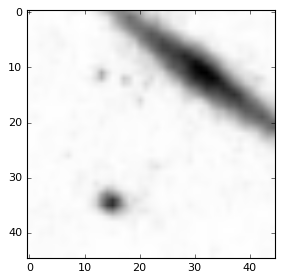

In [81]:
plt.imshow(all16[:, :, 0, 1, 0, 1, 0], cmap='Greys')
plt.show()

oops, should have been uint8s...

In [87]:
all16uint8 = all16.astype('uint8')

In [88]:
np.save('perspectives.npy', all16uint8)